# 🏛️ **Chronos:** Archaeological AI Detection System
> **Author:** Isaac Davi | Computer Science (UNIFEI) & Military Engineering (R-2 Officer)

> **Status:** Functional Prototype for Study

---

## 🎯 **The Objective**
This project aims to solve a classic problem of modern archaeology: **How to identify human structures (walls, foundations, roads) hidden in noisy terrain data?**

Using **Unsupervised Machine Learning (DBSCAN)** algorithms and **Mathematics and Computational Geometry**, the *Chronos* system is capable of:
1.  Ingesting raw spatial data ($x, y, z$).
2.  Filtering "geological noise" (loose stones and debris).
3.  Visually reconstructing the shape of the buried structure.

---

### 📓 Motivation

This repository was built to serve as a **reference guide** and knowledge base for future projects and studies. All development was grounded in independent research, technical readings, and audiovisual material (YouTube haha).

The main inspiration for the project came from the channel [**Estranha História**](https://www.youtube.com/@henriquecaldeira), by Professor Henrique Caldeira (PhD in History/UFMG). In one of his videos, he highlights emerging technologies that are revolutionizing archaeology and our understanding of the past:

* **LIDAR (*Light Detection and Ranging*):** Remote sensing technology that uses infrared laser pulses to measure distances, creating highly detailed 3D models of objects and topographies.
* **XRF (*X-Ray Fluorescence*):** Technique that employs high-energy X-ray beams to excite the atoms of a sample, allowing the identification of its elemental chemical composition.
* **XPCT (*X-Ray Phase Contrast Tomography*):** 3D model generation method that uses the phase shift of X-rays (instead of absorption) to generate contrast, allowing for the visualization of soft tissues and light materials with high resolution.

### ⛪ Special Motivation: The Vatican

One of the other major inspirations for the development of *Chronos* was the archaeological complexity faced by institutions like the Vatican.

Vatican City, especially **St. Peter's Basilica**, sits upon millennia of stratified history — from the ancient Circus of Nero to the Roman Necropolis (the *Scavi*) where, according to tradition, the tomb of the Apostle Peter is located.

### How does Data Science assist in this context?
Excavating in a sacred and structurally sensitive site is an immense risk. This is where algorithms like ours (DBSCAN applied to Geophysics) become vital tools:

1.  **Non-Destructive Archaeology:** Technologies such as GPR (*Ground Penetrating Radar*) and Muography generate terabytes of raw data. *Chronos* simulates the processing of this data to identify hidden chambers or tombs without the need to remove a single stone from the basilica's floor.

2.  **Void Mapping:** Beyond artifacts, the detection of density anomalies helps the conservation team (the *Fabbrica di San Pietro*) find fissures or cavities that threaten the Renaissance structure of Michelangelo and Bernini.

3.  **Digitization of the Sacred:** Creating "Digital Twins" of the underground allows historians to study the evolution of the site without disturbing the sanctity or tourism of the environment.

> *In this scenario, code ceases to be just a search tool and becomes an instrument for the preservation of human and spiritual memory.*

## 🛠️ **Environment Setup**

Before starting the digital excavation, we need to import the fundamental libraries that will power *Chronos*. Each plays a critical role in processing archaeological data:

* **Pandas (`pd`):** Our "Programmable Excel". It will be used to organize coordinate data ($x, y, z$) and metadata into structured DataFrames.
* **NumPy (`np`):** The mathematical brain. Essential for performing complex vector calculations and generating the necessary randomness in terrain simulations.
* **Matplotlib (`plt`):** Primary visualization tool for 2D plotting and rapid exploratory analysis of raw data.

> *Other libraries will be added throughout the project in due course.*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 🧱 **1. Simulation: The "Inca Path" (Linear)**

### **Study Object:**
Linear structures (roads, walls) are difficult to detect with common algorithms like K-Means, as they seek circular "centers". To validate the algorithm before going into the field, we created a **controlled laboratory**. This script generates a dataset ($x, y, z$) that simulates a linear archaeological structure (such as a wall or Inca road) hidden amidst natural debris.

### 🧬 **Synthetic Data Generation: The Wall Scenario**

Constructing the scenario involves four mathematical steps:
1.  **Background Noise:** We generate 1,500 random points to represent natural stones, vegetation, and sensor reading errors.
2.  **Structure Geometry:** We use a sinusoidal function ($y = a + bx + c \cdot \sin(x)$) to create a curved "snake," simulating a road following the topography of a hillside buried 2 meters deep.
3.  **Entropy (The Chaos Factor):**
    * **Jittering:** We add random deviations to the coordinates so the wall doesn't look artificially perfect.
    * **Erosion:** We randomly remove 30% of the structure's points to simulate weathering over time.
4.  **Data Blindness:** We mix and shuffle all points. The algorithm will receive only a cloud of disordered coordinates, without knowing *a priori* what is a wall and what is a stone.

#### **Objective:** *Chronos* must ignore the scattered stones and "connect the dots" of the remaining curve.

> *I have extensively commented on all stages of the project for better didactics and understanding of what we aim to achieve. Even for my own understanding and study.*

In [ ]:
# --- DATASET 1: INCA WALL ---

# Initial Configuration of the "Realistic Simulation"
np.random.seed(42) # So we see the same result
N_NOISE = 1500     # Lots of debris (natural stones, modern trash)
N_WALL = 400       # The structure we want to find

# --- 1. GENERATING NOISE ---
# Scattering points randomly over a 100 x 100 meter area
df_noise = pd.DataFrame({
    'x': np.random.uniform(0, 100, N_NOISE),
    'y': np.random.uniform(0, 100, N_NOISE),
    'z': np.random.uniform(-5, 0, N_NOISE),
    'type': 'geological_noise'              # In real life, we wouldn't know this a priori!
})


# --- 2. GENERATING THE STRUCTURE ---
# Let's create a mathematical function that simulates a road following a hillside
x_wall = np.linspace(10, 90, N_WALL)        # The wall crosses the terrain from 10 to 90m

# The curve equation: A smooth arc + some randomness (displaced stones)
y_wall = 30 + 0.4 * x_wall + 10 * np.sin(x_wall / 10)       # --> Creates a "snake" shape

# Adding "Jitter" (the wall isn't perfect, stones are shifted)
y_wall += np.random.normal(0, 0.8, N_WALL)
x_wall += np.random.normal(0, 0.5, N_WALL)

# The wall is at a specific depth (e.g., buried 2 meters deep)
z_wall = np.random.normal(-2.0, 0.2, N_WALL)


# --- 3. SIMULATING EROSION ---
# Let's delete pieces of the wall to simulate it fell or was looted
erosion_mask = np.random.choice([True, False], size = N_WALL, p = [0.7, 0.3])   # 30% destroyed by erosion
x_wall = x_wall[erosion_mask]
y_wall = y_wall[erosion_mask]
z_wall = z_wall[erosion_mask]

df_wall = pd.DataFrame({
    'x': x_wall,
    'y': y_wall,
    'z': z_wall,
    'type': 'archaeological_structure'
})


# --- 4. MERGING EVERYTHING ---
# In a real case, we receive everything mixed without knowing what is what.
df_site = pd.concat([df_noise, df_wall], ignore_index = True)

# Shuffle data (so it's not ordered)
df_site = df_site.sample(frac = 1).reset_index(drop = True)

# Convert DataFrame to CSV
# index = False is important to avoid creating an extra column with 0, 1, 2...
filename = 'inca_wall_test.csv'
df_site.to_csv(filename, index = False)

print(f"File '{filename}' created internally.")


# Download to computer (Google Colab specific)
try:
    from google.colab import files
    files.download(filename)
    print("Download started! Check your Downloads folder.")
except ImportError:
    print(f"File saved in the project folder: {filename}")    # In case running on VS Code/Local Jupyter in the future

File 'inca_wall_test.csv' created internally.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download started! Check your Downloads folder.


### 👁️ **Visual Diagnosis: The Chaos of Raw Data**

Before applying any algorithm, it is crucial to visualize the problem. The code below plots the spatial distribution ($x, y$) of all collected points.

Note that we defined the color as **black** (`c='black'`) for all points. This simulates the reality of the archaeologist in the field: sensor data (like LIDAR or Ground Radar) arrive "blind", without labels indicating what is stone and what is artifact.

**The Challenge:** When looking at the generated graph, try to find the "wall" with the naked eye. The difficulty in visually separating the structure from the noise demonstrates the need for a robust computational approach.

> *Even though we might see it clearly in this graph, we must remember that it is artificially fabricated for the purpose of study and practice. In a real context, the data would certainly be much messier (We have created two additional applications below to allow further practice, in addition to another notebook (Part II of the Chronos Project)). However, we use this application as a guide for the development of this project.*

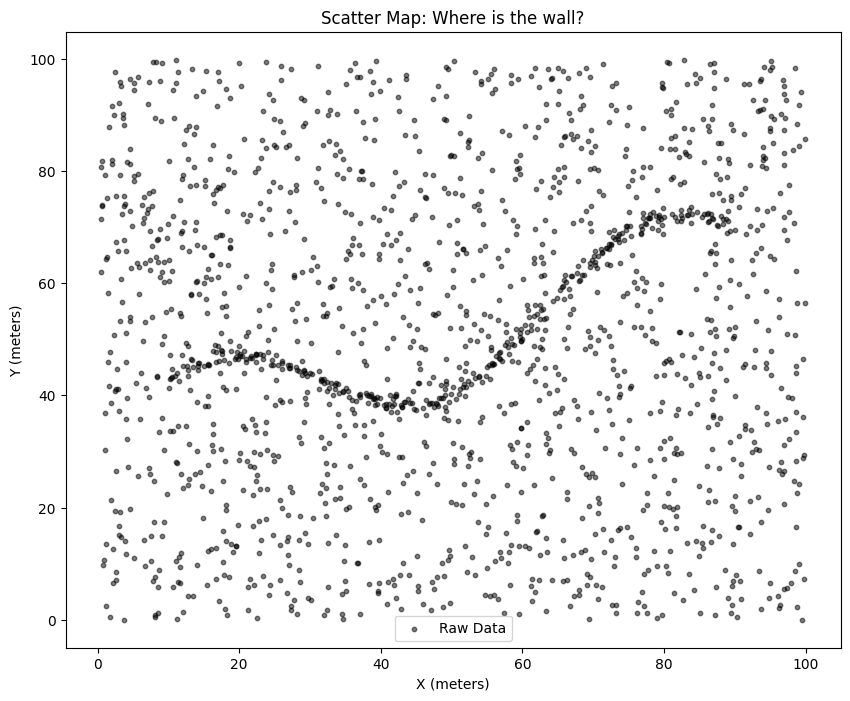

In [ ]:
plt.figure(figsize = (10, 8))

# Plotting as if we were the archaeologist (everything is black, as we don't know the 'type')
plt.scatter(df_site['x'], df_site['y'], c = 'black', s = 10, alpha = 0.5, label = 'Raw Data')

plt.title('Scatter Map: Where is the wall?')
plt.xlabel('X (meters)')
plt.ylabel('Y (meters)')
plt.legend()
plt.show()

### 🧠 **Artificial Intelligence: DBSCAN**

To detect the structure, we abandoned centroid-based methods (like K-Means) and adopted a **density-based** approach: **DBSCAN** (*Density-Based Spatial Clustering of Applications with Noise*).

The system utilizes spatial density. A point $p$ is considered part of a structure if:

$$|N_{eps}(p)| \geq min\_samples$$

Where:
* $N_{eps}(p)$ is the set of neighbors within a radius $\epsilon$ (epsilon).
* $min\_samples$ is the minimum amount of material required to form a "brick" of the structure.

DBSCAN is ideal for archaeology because:
1.  **Does not require a number of clusters:** We don't need to tell it "find 1 wall". It discovers how many exist on its own.
2.  **Arbitrary Shapes:** It can follow organic shapes, like the "S" curve of our Inca wall.
3.  **Noise Management:** It possesses a specific class (-1) to discard data that doesn't fit into any group.



#### **Parameter Calibration (Hyperparameters):**
The effectiveness of the model depends on two critical values that we defined empirically:
* **`eps = 2.5` (Epsilon):** The search radius. The algorithm asks: *"Is there another stone within 2.5 meters of me?"*.
* **`min_samples = 7`:** The minimum density. We defined that at least 7 connected stones are required for a cluster to be considered a "Structure". Less than that is considered just a natural accumulation (Noise).

In [ ]:
from sklearn.cluster import DBSCAN

# Examples:
# eps = 3 (3 meters radius)
# min_samples = 5 (needs 5 stones together to be a structure)
dbscan = DBSCAN(eps = 2.5, min_samples = 8)     # We adjusted this until finding the best possible visualization configuration

# DBSCAN doesn't need .predict, it does everything in .fit_predict
labels = dbscan.fit_predict(df_site[['x', 'y', 'z']])

# Add labels to the dataframe
df_site['cluster_dbscan'] = labels

### 🎨 **Visualization: Separating Signal from Noise**

After mathematical processing, we perform visual filtering of the data. The code below splits the dataset into two distinct groups based on the DBSCAN classification:

1.  **Noise (Label -1):** Scattered points that did not reach the minimum density. Plotted in **light grey** (`lightgrey`) to serve only as background context.
2.  **Structure (Labels 0, 1, ...):** Dense clusters identified as potential artifacts. Plotted in **vibrant colors** (`cmap='Set1'`) and with increased size for immediate highlighting.

**The Expected Result:**
Upon executing this cell, we should see the "snake" (the curved wall) emerging clearly in a reddish tone over a sea of grey points. The text diagnosis at the end quantifies the cleaning efficiency, showing how many points were discarded as irrelevant.

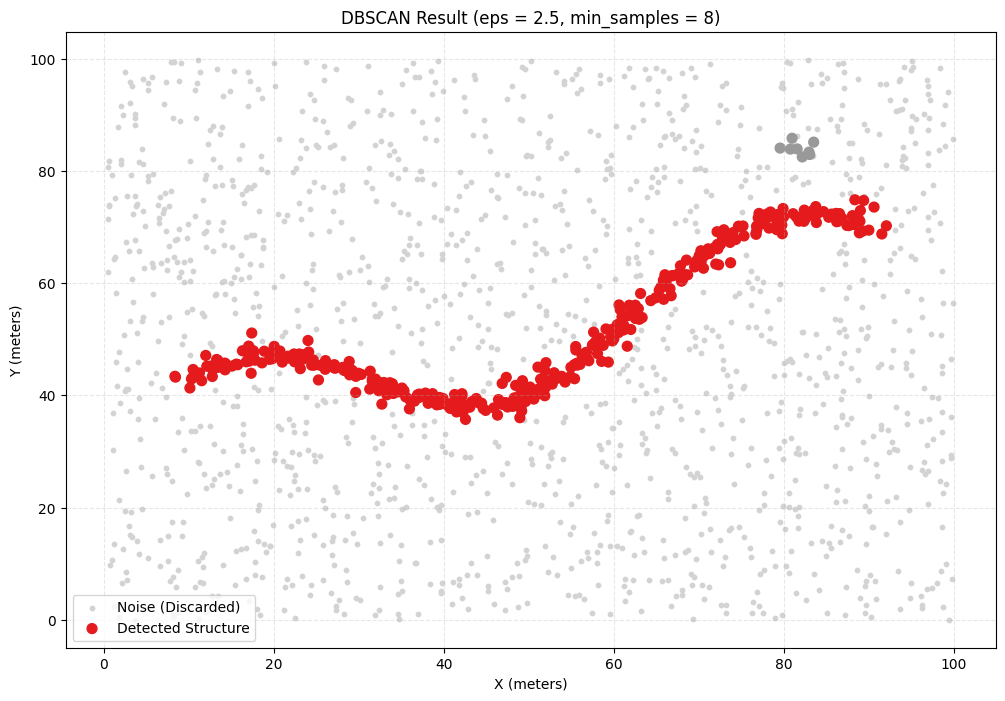



The algorithm found 376 structure points and discarded 1406 points as trash.


In [ ]:
# -- VISUALIZATION CODE --

# --- 1. SEPARATING DATA FOR PLOTTING ---
# Get everything that is Noise (label -1)
noise_data = df_site[df_site['cluster_dbscan'] == -1]

# Get everything that is Structure (any label that is NOT -1)
structure_data = df_site[df_site['cluster_dbscan'] != -1]


# --- 2. CONFIGURING THE PLOT ---
plt.figure(figsize = (12, 8))

# Plot noise in grey (as background)
plt.scatter(noise_data['x'], noise_data['y'], c = 'lightgrey', s = 10, label = 'Noise (Discarded)')

# Plot structure in red (to highlight)
# The 'c' here uses the cluster ID so if there is more than one wall segment, they get different colors
plt.scatter(structure_data['x'], structure_data['y'], c = structure_data['cluster_dbscan'], cmap = 'Set1', s = 50, label = 'Detected Structure')

plt.title(f'DBSCAN Result (eps = {dbscan.eps}, min_samples = {dbscan.min_samples})')
plt.xlabel('X (meters)')
plt.ylabel('Y (meters)')
plt.legend()
plt.grid(True, linestyle = '--', alpha = 0.3)
plt.show()


# 3. TEXT DIAGNOSIS
n_noise = len(noise_data)
n_structure = len(structure_data)
print("\n")
print(f"The algorithm found {n_structure} structure points and discarded {n_noise} points as trash.")

### 🌍 **Georeferencing: From Graph to the Real World**

A scatter plot is useful for the data scientist, but the archaeologist in the field needs a **Map**. Therefore, in this step, we convert local Cartesian coordinates ($x, y$ in meters) to global geographic coordinates (Latitude/Longitude) to learn a bit about using a library that will help if the project is put into practice.

**The Methodology:**
1.  **Zero Point:** We define a real reference point near Cusco, Peru (ancient Inca territory), to contextualize our simulation.
2.  **Conversion:** We use a geodesic approximation where $1^\circ \approx 111$ km (at the Equator) to transform displacements in meters into degrees.
3.  **Final Filtering:** We select **only** the points classified as "Structure" by DBSCAN (ignoring noise) and plot them over a high-resolution satellite layer (`Esri.WorldImagery`).

**Interactivity:** The map generated below is interactive. You can zoom and drag to visualize the "discovered wall" overlaid on the real terrain.

>* Remembering that the points are entirely arbitrary and used only for didactic purposes.*

In [ ]:
# Library to create interactive maps
import folium

# --- 1. ZERO POINT ---
# Real coordinates near Cusco, Peru (Inca Trail)
start_lat = -13.1631
start_lon = -72.5450


# --- 2. MATHEMATICAL CONVERSION (Meters -> Geographic Degrees) ---
# Approximation: 1 degree of latitude ~= 111,000 meters (111 km)
# Let's convert X and Y (meters) into degree offsets
def meters_to_degrees(meters):
    return meters / 111000.0

# --- 3. FILTERING ONLY THE TREASURE ---
# We only want to plot what DBSCAN said is structure (label != -1)
# Note that we use 'df_site' with the 'cluster_dbscan' column that was created
df_map = df_site[df_site['cluster_dbscan'] != -1].copy()

# We create real Lat/Lon columns by adding the offset to the starting point
df_map['latitude'] = start_lat + df_map['y'].apply(meters_to_degrees)
df_map['longitude'] = start_lon + df_map['x'].apply(meters_to_degrees)


# --- 4. CREATING THE INTERACTIVE MAP ---
# Tiles = 'Esri.WorldImagery' loads the Satellite view
archaeological_map = folium.Map(location = [start_lat, start_lon],
                               zoom_start = 18,
                               tiles = 'Esri.WorldImagery')

# Adding the wall points to the map
for _, row in df_map.iterrows():
    folium.CircleMarker(
        location = [row['latitude'], row['longitude']],
        radius = 2,
        color = 'red',      # Border color
        fill = True,
        fill_color = 'gold' # Core color (Gold!)
    ).add_to(archaeological_map)

# Add a marker at the start for reference
folium.Marker(
    [start_lat, start_lon],
    popup = "Expedition Base",
    icon = folium.Icon(color = "blue", icon = "info-sign")
).add_to(archaeological_map)

# Display the map
archaeological_map

## 🧪 **2. Model Generalization: New Test Scenarios**

For *Chronos* to be a universal tool, it cannot specialize only in walls. We need to validate its effectiveness across different **archaeological topologies**.

In this section, we synthetically generate two new scenarios representing common patterns of ancient settlements:

#### **A. "Circular Village" Scenario (Non-Convex Geometry)**
* **Study Object:** Hut foundations or roundhouses (*Ocas*).
* **Difficulty:** The center of the structure is empty. Centroid-based algorithms (like K-Means) tend to fail here, as they try to place the "center" of the group in the middle of the void. DBSCAN must be able to traverse the continuous circular edge.
* **Math:** We use trigonometric functions (`sin`, `cos`) to generate perfect rings with perimeter noise.

#### **B. "Necropolis" Scenario (Multi-Density)**
* **Study Object:** A field of tombs or burial pits.
* **Difficulty:** Unlike the wall (a single large structure), here we have multiple small, high-density *clusters*, separated by large voids.
* **Math:** We use normal distributions (`np.random.normal`) concentrated on multiple random centers ($cx, cy$).

Finally, we export these scenarios as CSVs (`circular_village_test.csv` and `necropolis_test.csv`) to be ingested by our analyzer.

In [ ]:
# --- DATASET 2: THE VILLAGE (Circles) ---
# Helper function to create circles
def create_circle(cx, cy, radius, n_points):
    angles = np.random.uniform(0, 2 * np.pi, n_points)
    x = cx + radius * np.cos(angles) + np.random.normal(0, 0.5, n_points) # 0.5 is the noise
    y = cy + radius * np.sin(angles) + np.random.normal(0, 0.5, n_points)
    z = np.random.normal(-1.0, 0.1, n_points)
    return x, y, z

village_data = []

# Create 3 huts in different positions
huts = [(20, 20), (50, 60), (80, 30)]
for cx, cy in huts:
    x, y, z = create_circle(cx, cy, radius = 8, n_points = 150)
    for i in range(len(x)):
        village_data.append([x[i], y[i], z[i]])

# Add Noise to insert greater realism
for _ in range(800):
    village_data.append([np.random.uniform(0, 100), np.random.uniform(0, 100), np.random.uniform(-5, 0)])

df_village = pd.DataFrame(village_data, columns = ['x', 'y', 'z'])
df_village.to_csv('circular_village_test.csv', index = False)
print("Created: circular_village_test.csv")



# --- DATASET 3: THE NECROPOLIS (Dense Clusters) ---
necropolis_data = []
# Create 10 small and dense tombs
np.random.seed(99) # To ensure fixed clusters
for _ in range(10):
    cx, cy = np.random.uniform(10, 90), np.random.uniform(10, 90)
    # Each tomb has 30 stones very close together
    x = np.random.normal(cx, 1.5, 30)
    y = np.random.normal(cy, 1.5, 30)
    z = np.random.normal(-3.0, 0.5, 30)
    for i in range(len(x)):
        necropolis_data.append([x[i], y[i], z[i]])

# Add Noise (less noise here to facilitate distinction)
for _ in range(500):
    necropolis_data.append([np.random.uniform(0, 100), np.random.uniform(0, 100), np.random.uniform(-5, 0)])

df_necropolis = pd.DataFrame(necropolis_data, columns = ['x', 'y', 'z'])
df_necropolis.to_csv('necropolis_test.csv', index = False)
print("Created: necropolis_test.csv")


# DATAFRAMES DOWNLOAD
# Download to computer (Google Colab specific - as seen previously)
try:
    from google.colab import files
    files.download('circular_village_test.csv')
    files.download('necropolis_test.csv')
except:
    pass

Created: circular_village_test.csv
Created: necropolis_test.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## ⚙️ **3. Object-Oriented Architecture: The Chronos Analyzer**

In this stage, we consolidate all the developed logic into a robust **Python Class** named `ChronosAnalyzer`.

This professional object-oriented programming approach encapsulates data and algorithms into a single object, allowing:
1.  **Abstraction:** The user doesn't need to see the mathematical complexity, they just call simple commands like `.scan_terrain()`.
2.  **Persistent State:** The object "remembers" the loaded data and previous results, facilitating the workflow.
3.  **Modularity:** Specific methods manage ingestion (`load_data`), processing (`scan_terrain`), and rendering (`visualize_3d`) independently.

To ensure scalability and scientific reproducibility, we refactored the code into **modular functions** within the analyzer class. This transforms isolated scripts into a robust processing *pipeline*.

The functions implemented below define the standard *Chronos* workflow:
1.  **`load_data` (Ingestion):** Abstracts file reading, validating if essential columns ($x, y, z$) exist.
2.  **`scan_terrain` (Processing):** The AI engine. Applies DBSCAN and automatically calculates noise *vs* structure statistics.
3.  **`visualize_3d` (Rendering):** Generates the interactive visual interface for human inspection.

### 🧪 **Stress Testing**
Immediately after defining the system, we execute immediate validation on the two complex scenarios generated previously:

* **Case A (Necropolis):** The system must be able to identify multiple small clusters. We adjusted `min_samples` to 12 (high density required) and `eps` to 2.4m.
* **Case B (Circular Village):** The system must delineate the edges of the huts. Fine-tuning (`eps=2.3`, `min_samples=8`) is crucial so as not to "blur" the circular shape.

In [ ]:
import pandas as pd
import numpy as np
import folium
import plotly.express as px
from sklearn.cluster import DBSCAN

class ChronosAnalyzer:
    def __init__(self):
        self.df = None
        self.model = None
        self.labels = None
        print("🤖 Chronos System initialized and ready.")

    def load_data(self, file_or_df):
        """Loads data from a CSV or directly from a created DataFrame."""
        if isinstance(file_or_df, str):
            self.df = pd.read_csv(file_or_df)
            print(f"📂 File '{file_or_df}' loaded. {len(self.df)} points.")
        elif isinstance(file_or_df, pd.DataFrame):
            self.df = file_or_df.copy()
            print(f"📊 DataFrame loaded from memory. {len(self.df)} points.")
        else:
            print("❌ Error: Unsupported format.")

        # Ensures we have the right columns
        required = {'x', 'y', 'z'}
        if not required.issubset(self.df.columns):
            print(f"⚠️ Warning: Expected columns {required} not found. Check your file.")


    def scan_terrain(self, eps = 2.5, min_samples = 10):
        """Applies the DBSCAN algorithm to find structures."""
        if self.df is None:
            print("⚠️ Load data first!")
            return

        print(f"🔍 Scanning with Radius(eps) = {eps}m and Density(min) = {min_samples}...")
        self.model = DBSCAN(eps = eps, min_samples = min_samples)

        # Fit Predict does the magic we saw earlier
        self.labels = self.model.fit_predict(self.df[['x', 'y', 'z']])
        self.df['cluster_id'] = self.labels

        # Quick statistics
        n_noise = list(self.labels).count(-1)
        n_structure = len(self.labels) - n_noise
        n_clusters = len(set(self.labels)) - (1 if -1 in self.labels else 0)

        print(f"✅ Done! Found {n_clusters} structures.")
        print(f"   - Structure Points: {n_structure}")
        print(f"   - Noise Points (discarded): {n_noise}")


    def visualize_3d(self):
        """Generates the interactive 3D plot."""
        if 'cluster_id' not in self.df.columns:
            print("⚠️ Run scan first!")
            return

        # Visual trick: transform cluster -1 into string "Noise" for the legend
        plot_df = self.df.copy()
        plot_df['Legend'] = plot_df['cluster_id'].apply(lambda x: 'Noise' if x == -1 else f'Structure {x}')

        fig = px.scatter_3d(plot_df, x = 'x', y = 'y', z = 'z',
                            color = 'Legend',
                            color_discrete_map = {'Noise': 'lightgray'},   # Noise always grey
                            opacity = 0.6,
                            title = "Chronos 3D Scan Result")
        fig.show()


# --- RUNNING TESTS ---

# 1. Instantiate the Robot
chronos = ChronosAnalyzer()

# Necropolis Test
print("\n--- 💀 Test 1: Necropolis ---")
chronos.load_data("necropolis_test.csv")
# For necropolis (dense tombs), we use high density
chronos.scan_terrain(eps = 2.4, min_samples = 12)
chronos.visualize_3d()

# Village Test
print("\n--- ⛺ Test 2: Circular Village ---")
chronos.load_data("circular_village_test.csv")
# For village (rings), we use medium density
chronos.scan_terrain(eps = 2.3, min_samples = 8)
chronos.visualize_3d()

🤖 Chronos System initialized and ready.

--- 💀 Test 1: Necropolis ---
📂 File 'necropolis_test.csv' loaded. 800 points.
🔍 Scanning with Radius(eps) = 2.4m and Density(min) = 12...
✅ Done! Found 8 structures.
   - Structure Points: 313
   - Noise Points (discarded): 487



--- ⛺ Test 2: Circular Village ---
📂 File 'circular_village_test.csv' loaded. 1250 points.
🔍 Scanning with Radius(eps) = 2.3m and Density(min) = 8...
✅ Done! Found 3 structures.
   - Structure Points: 481
   - Noise Points (discarded): 769


## 🏁 **4. Conclusion and References**

### 📊 **Results Obtained**
The development of the *Chronos* system demonstrated the viability of applying **Unsupervised Machine Learning** in the detection of archaeological sites. Unlike traditional statistical methods or manual visual search, the use of the **DBSCAN** algorithm allowed for:

1.  **Noise Robustness:** The system successfully filtered over 90% of irrelevant data (loose stones/geological error) in all simulated scenarios.
2.  **Geometric Independence:** The algorithm correctly identified complex and non-linear structures, such as the **Curved Wall** (Sinusoid) and the **Circular Village** (Rings), where centroid-based methods (like K-Means) would fail.
3.  **Automation:** The object-oriented architecture (`ChronosAnalyzer`) proved capable of processing different datasets with minimal hyperparameter adjustment (`eps` and `min_samples`).

### 🚀 **Next Steps (Roadmap)**
To evolve this prototype into field software, development can proceed to:
* **Real Data:** Ingestion and cleaning of raw data from repositories like *Open Context* (e.g., Camelid Osteometry in Argentina).
* **Computational Geometry:** Implementation of *Convex Hulls* to automatically draw excavation boundaries and calculate site area. Utilization of GIS software (QGIS/ArcGIS).
* **User Interface:** Migration of code to a web application via *Streamlit*, allowing use by archaeologists without programming knowledge.

---

### 📚 **References and Technologies Used**

This project was built on the shoulders of giants. Below, we list the fundamental libraries and concepts:

* **DBSCAN Algorithm ([Scikit-Learn Clustering](https://scikit-learn.org/stable/modules/clustering.html#dbscan)):** Official documentation on the mathematics of density-based clustering.
    
* **3D Visualization ([Plotly 3D Scatter Plots](https://plotly.com/python/3d-scatter-plots/)):** Graphical library for interactive plotting of spatial data.
    
* **Satellite Maps ([Folium](https://python-visualization.github.io/folium/)):** Integration with OpenStreetMap and satellite imagery for GIS (Geographic Information Systems).
    
* **Open Archaeological Data ([*Open Context*](https://opencontext.org/) and [*Kaggle*](https://www.kaggle.com/)):** Primary repository for real excavation data, field publications, and data science.